In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
dim = 15
grid = np.matrix(np.zeros((dim,dim)))

generated_coord = set()

while len(generated_coord) < 5*dim:
    x = random.randint(0, dim-1)
    y = random.randint(0, dim-1)
    generated_coord.add((x, y))

points = list(generated_coord)

for point in points:
    grid[point[0],point[1]] = 1

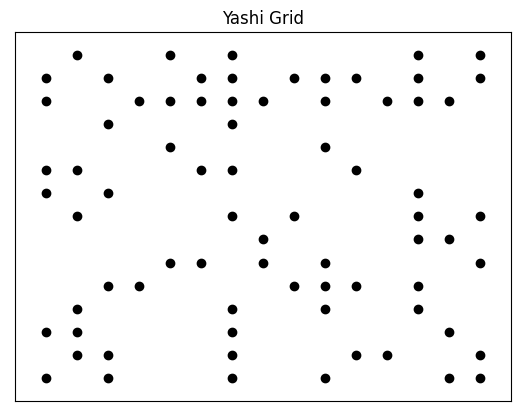

In [3]:
x_coords = [point[0] for point in list(generated_coord)]
y_coords = [point[1] for point in list(generated_coord)]

plt.scatter(x_coords, y_coords, color='black')

plt.title('Yashi Grid')
plt.xlim(-1, dim)
plt.ylim(-1, dim)

plt.xticks([])
plt.yticks([])

plt.show()

In [4]:
def check_intersection(line1, line2):
    (x1, y1), (x2, y2) = line1
    (x3, y3), (x4, y4) = line2

    return (min(x1, x2) < x3 < max(x1, x2) and min(y3, y4) < y1 < max(y3, y4)) or (min(y1, y2) < y3 < max(y1, y2) and min(x3, x4) < x1 < max(x3, x4))

def check_overlap(line1, line2):
    x1, y1 = line1[0]
    x2, y2 = line1[1]
    x3, y3 = line2[0]
    x4, y4 = line2[1]

    if y1 == y2 == y3 == y4:
        if (min(x1, x2) < x3 < max(x1, x2)) or (min(x3, x4) < x1 < max(x3, x4)) or (min(x1, x2) < x4 < max(x1, x2)) or (min(x3, x4) < x2 < max(x3, x4)):
            return True

    if x1 == x2 == x3 == x4:
        if (min(y1, y2) < y3 < max(y1, y2)) or (min(y3, y4) < y1 < max(y3, y4)) or (min(y1, y2) < y4 < max(y1, y2)) or (min(y3, y4) < y2 < max(y3, y4)):
            return True

    return False

def is_point_on_line(point, line):
    x, y = point
    (x1, y1), (x2, y2) = line

    if (y == y1 and min(x1, x2) < x < max(x1, x2)) or (x == x1 and min(y1, y2) < y < max(y1, y2)):
        return True

    return False

def does_line_intersect_points(new_line, points):
    return any(is_point_on_line(point, new_line) for point in points)


In [5]:
def lines_to_undirected_graph(lines):
    graph = {}

    for line in lines:
        start, end = line

        if end in graph:
            graph[end].append(start)
        else:
            graph[end] = [start]

        if start in graph:
            graph[start].append(end)
        else:
            graph[start] = [end]

    return graph


def has_cycle(lines):

    graph = lines_to_undirected_graph(lines)
    visited = set()
    stack = [lines[-1][0]]

    while stack:
        node = stack.pop()

        if node in visited:
            return True

        visited.add(node)
        # Add unvisited neighbors to the stack
        for neighbor in graph[node]:
            if neighbor not in visited:
                stack.append(neighbor)
    
    return False


In [6]:
lines = []

for idx_i, i in enumerate(points):
    for idx_j, j in enumerate(points):
        if (i[0] == j[0] or i[1] == j[1]) and idx_i != idx_j:
            new_line = tuple(sorted((i, j)))
            temp_list = lines + [new_line]
            intersect = False
            if len(lines) != 0:
                if new_line not in lines and not has_cycle(temp_list):
                    for line in lines:
                        if check_intersection(new_line, line) or check_overlap(new_line, line) or does_line_intersect_points(new_line, points):
                            intersect = True
                            break
                    if not intersect:
                        lines.append(new_line)
            else:
                if not does_line_intersect_points(new_line, points):
                    lines.append(new_line)

In [7]:
def is_solved(lines, points):
    graph = lines_to_undirected_graph(lines)
    visited = set()
    stack = [next(iter(graph.keys()))]

    while stack:
        node = stack.pop()
        if node not in visited:
            visited.add(node)
            for neighbor in graph[node]:
                stack.append(neighbor)
    if len(visited) == len(points):
        sol = 'solved!'
    else:
        sol = 'not solved :('

    return sol

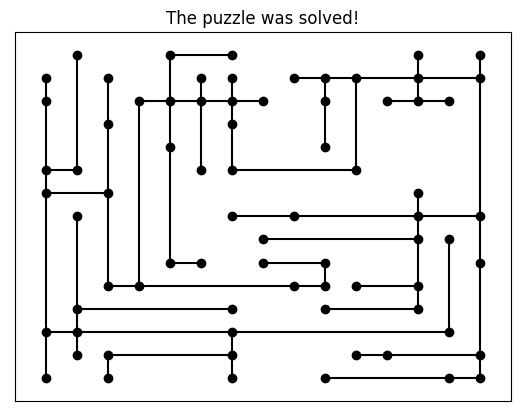

In [8]:
x_coords = [point[0] for point in points]
y_coords = [point[1] for point in points]

plt.scatter(x_coords, y_coords, color='black')
#for i in points:
#    plt.text(i[0], i[1], '({}, {})'.format(i[0], i[1]), fontsize=9)
    
for line in lines:
    x_coords = [line[0][0], line[1][0]]
    y_coords = [line[0][1], line[1][1]]
    plt.plot(x_coords, y_coords, color='black', label='Lines')

    
plt.title('The puzzle was {}'.format(is_solved(lines, points)))
plt.xlim(-1, dim)
plt.ylim(-1, dim)

plt.xticks([])
plt.yticks([])

plt.show()